# Wstęp do przetwarzania języka naturalnego

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import nltk

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data
from torch.utils.data import Dataset, DataLoader

torch.manual_seed(1)

/Users/Kuba/miniforge3/envs/SSNE/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
def get_device():
    """Returns the available device for computation.
    Returns:
        torch.device: available device for computation
    """
    compute_device = None
    if torch.cuda.is_available():
        compute_device = torch.device('cuda')
    elif torch.backends.mps.is_available():
        compute_device = torch.device('mps')
    else:
        compute_device = torch.device('cpu')
    
    print(f'device is {compute_device}')
    return compute_device


In [24]:
# device = get_device()
device = torch.device("cpu") 
device

device(type='cpu')

### Średniowieczne podejścia - bag of words

## Bag of Words - słownik z policzonymi wystąpieniami kazdego wyrazu

In [5]:
from bs4 import BeautifulSoup
import re

In [6]:
reviews = pd.read_csv("data/sst2.tsv", delimiter="\t", quoting=3).reset_index(drop=True)

In [7]:
reviews

,sentence,label
0,hide new secretions from the parental units,0
1,"contains no wit , only labored gags",0
2,that loves its characters and communicates som...,1
3,remains utterly satisfied to remain the same t...,0
4,on the worst revenge-of-the-nerds clichés the ...,0
...,...,...
67344,a delightful comedy,1
67345,"anguish , anger and frustration",0
67346,"at achieving the modest , crowd-pleasing goals...",1
67347,a patient viewer,1


In [8]:
print(reviews["sentence"][4])

on the worst revenge-of-the-nerds clichés the filmmakers could dredge up 


In [9]:
nltk.data.path.append('/Users/Kuba/Coding/nltk_data')

from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
def review_to_words(raw_review):
    """Function to convert a review to a string of words.
    The input is a single string (a raw moviw review), and the output is a single string (a preprocessed movie review)"""
    review_text = BeautifulSoup(raw_review, 'lxml').get_text()
    letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    words = letters_only.lower().split()
    stops = set(stopwords.words('english'))
    meaningful_words = [word for word in words if not word in stops]
    return " ".join(meaningful_words)

In [13]:
reviews['sentence'][4]

'on the worst revenge-of-the-nerds clichés the filmmakers could dredge up '

In [11]:
clean_review = review_to_words(reviews['sentence'][4])
print(clean_review)

worst revenge nerds clich filmmakers could dredge


In [12]:
num_reviews = reviews['sentence'].size

# Initialize an empty list to hold the clean reviews
clean_train_reviews = []

# Loop over each review; create an index i that goes from 0 to the length of the move review list
for review in range(0, num_reviews):
    # If the index is evenly divisible by 100, print a message
    if (review+1) % 1000 == 0:
        print('Review {} of {}'.format(review+1, num_reviews))
    # Call our function for each one, and add the result to the list of clean reviews
    clean_train_reviews.append(review_to_words(reviews['sentence'][review]))

/Users/Kuba/miniforge3/envs/SSNE/lib/python3.8/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


Review 1000 of 67349
Review 2000 of 67349
Review 3000 of 67349
Review 4000 of 67349
Review 5000 of 67349
Review 6000 of 67349
Review 7000 of 67349
Review 8000 of 67349
Review 9000 of 67349
Review 10000 of 67349
Review 11000 of 67349
Review 12000 of 67349
Review 13000 of 67349
Review 14000 of 67349
Review 15000 of 67349
Review 16000 of 67349
Review 17000 of 67349
Review 18000 of 67349
Review 19000 of 67349
Review 20000 of 67349
Review 21000 of 67349
Review 22000 of 67349
Review 23000 of 67349
Review 24000 of 67349
Review 25000 of 67349
Review 26000 of 67349
Review 27000 of 67349
Review 28000 of 67349
Review 29000 of 67349
Review 30000 of 67349
Review 31000 of 67349
Review 32000 of 67349
Review 33000 of 67349
Review 34000 of 67349
Review 35000 of 67349
Review 36000 of 67349
Review 37000 of 67349
Review 38000 of 67349
Review 39000 of 67349
Review 40000 of 67349
Review 41000 of 67349
Review 42000 of 67349
Review 43000 of 67349
Review 44000 of 67349
Review 45000 of 67349
Review 46000 of 673

In [14]:
print('Creating the bag of words...')
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's bag of words tool.
vectorizer = CountVectorizer(analyzer = 'word',
                            tokenizer = None,
                            preprocessor = None,
                            stop_words = None,
                            max_features = 1000)
# fit_transform() does two functions: First, it fits the model
# and learns the vocaulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of strings.
train_data_features = vectorizer.fit_transform(clean_train_reviews)

# Numpy arrays are easy to work with, so convert the result to an array
train_data_features = train_data_features.toarray()
print('Bag of words completed')

Creating the bag of words...
Bag of words completed


In [15]:
vocab = vectorizer.get_feature_names()
print(len(vocab))

1000


/Users/Kuba/miniforge3/envs/SSNE/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [17]:
train_indices = np.random.rand(len(reviews))>0.3
train_data = torch.from_numpy(train_data_features).float()[train_indices]
train_targets = torch.from_numpy(reviews["label"].values[train_indices]).long()

test_data = torch.from_numpy(train_data_features[~train_indices]).float()
test_targets = torch.from_numpy(reviews["label"].values[~train_indices]).long()

In [18]:
train_dataset = data.TensorDataset(train_data,train_targets)
test_dataset = data.TensorDataset(test_data,test_targets)

In [19]:
train_loader = data.DataLoader(train_dataset, batch_size=64, shuffle=True, drop_last=True)
test_loader = data.DataLoader(test_dataset, batch_size=128, shuffle=False)

In [25]:
class BoWClassifier(nn.Module):
    def __init__(self): 
        super(BoWClassifier, self).__init__()
        self.lin1 =nn.Linear(1000, 500)  # na wejściu rozmiar słownika BoW
        self.act1 =nn.LeakyReLU()
        self.lin2 =nn.Linear(500, 50)
        self.act2 =nn.LeakyReLU()
        self.lin3 =nn.Linear(50, 5)
        
             
    def forward(self, x):
        x = self.lin1(x)
        x = self.act1(x)
        x = self.lin2(x)
        x = self.act2(x)
        x = self.lin3(x)
        return x
bow_model = BoWClassifier().to(device)
bow_model

BoWClassifier(
  (lin1): Linear(in_features=1000, out_features=500, bias=True)
  (act1): LeakyReLU(negative_slope=0.01)
  (lin2): Linear(in_features=500, out_features=50, bias=True)
  (act2): LeakyReLU(negative_slope=0.01)
  (lin3): Linear(in_features=50, out_features=5, bias=True)
)

In [26]:
def get_accuracy(model, data_loader):
    correct = 0
    total = 0
    model.eval()
    for imgs, labels in data_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        output = model(imgs)
        pred = output.max(1, keepdim=True)[1] # get the index of the max logit
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [27]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(bow_model.parameters(), lr=0.001)

iters = []
losses = []
train_acc = []
val_acc = []
for n in range(10):
    epoch_losses = []
    for x, labels in iter(train_loader):
        x, labels = x.to(device), labels.to(device)
        bow_model.train() 
        out = bow_model(x).squeeze()           

        loss = criterion(out, labels)
        loss.backward()  
        epoch_losses.append(loss.item())
        optimizer.step()              
        optimizer.zero_grad()         

    loss_mean = np.array(epoch_losses).mean()
    iters.append(n)
    losses.append(loss_mean)
    test_acc = get_accuracy(bow_model, test_loader)
    print(f"Epoch {n} loss {loss_mean:.3} test_acc: {test_acc:.3}")
    train_acc.append(get_accuracy(bow_model, train_loader)) # compute training accuracy 
    val_acc.append(test_acc)  # compute validation accuracy
        

print("Final Training Accuracy: {}".format(train_acc[-1]))
print("Final Validation Accuracy: {}".format(val_acc[-1]))

Epoch 0 loss 0.532 test_acc: 0.757
Epoch 1 loss 0.432 test_acc: 0.78
Epoch 2 loss 0.385 test_acc: 0.79
Epoch 3 loss 0.344 test_acc: 0.801
Epoch 4 loss 0.311 test_acc: 0.806
Epoch 5 loss 0.291 test_acc: 0.811
Epoch 6 loss 0.277 test_acc: 0.812
Epoch 7 loss 0.266 test_acc: 0.811
Epoch 8 loss 0.26 test_acc: 0.81
Epoch 9 loss 0.255 test_acc: 0.816
Final Training Accuracy: 0.8640030570652174
Final Validation Accuracy: 0.8164738455453376


In [28]:
example_1_text = "I do not like this movie"
example_2_text = "I like this movie"
examples = vectorizer.transform([review_to_words(example_1_text), review_to_words(example_2_text)])
examples = torch.from_numpy(examples.toarray()).to(device).float()
bow_model(examples)

tensor([[ 1.0000,  2.0528, -8.5867, -8.8625, -8.7360],
        [ 1.0000,  2.0528, -8.5867, -8.8625, -8.7360]],
       grad_fn=<AddmmBackward0>)

In [ ]:
example_1_text = "The topic of this movie is love"
example_2_text = "I love a movie about this topic"
examples = vectorizer.transform([review_to_words(example_1_text), review_to_words(example_2_text)])
examples = torch.from_numpy(examples.toarray()).to(device).float()
bow_model(examples)

### Embeddingi w języku

In [29]:
import gensim.downloader as api
from gensim.models.word2vec import Word2Vec
corpus = api.load('text8')
gensim_model = Word2Vec(corpus)

[==================================================] 100.0% 31.6/31.6MB downloaded


In [30]:
gensim_model.wv["king"]

array([ 1.5657874 ,  0.5802301 ,  0.9599842 ,  2.0401988 ,  0.01017607,
        1.1154113 , -0.85396296,  2.0660126 ,  2.6399565 ,  2.9544566 ,
       -1.8765633 , -0.8399683 ,  1.4141318 ,  4.705701  , -0.8436778 ,
       -0.3072934 ,  0.81900316,  0.4503999 ,  1.2212082 , -1.1091694 ,
        0.7618282 ,  3.2822568 ,  0.4011031 , -1.8764749 , -0.77005416,
        2.177788  ,  1.3152901 ,  0.06356505,  1.297119  , -1.6865342 ,
       -2.23248   , -2.2781546 , -1.2313408 ,  2.5466423 ,  3.1863596 ,
        0.17073743,  1.6195778 , -1.5730758 , -1.1301043 , -0.8800659 ,
       -0.01639194,  2.158868  ,  2.2817113 , -0.14898838, -2.533003  ,
       -3.7532387 ,  0.65051943, -0.56905884,  0.30774218, -2.0587833 ,
        2.9412203 ,  0.03276407,  0.34447792,  3.1777818 , -0.66052824,
       -1.0458318 ,  0.27254787, -0.60216904,  0.6171592 , -0.95643073,
       -0.16799724,  0.36829904,  2.2839334 ,  0.23976076,  0.29311976,
        0.48641133, -1.9033241 ,  1.6407989 ,  1.5431995 , -1.67

In [31]:
gensim_model.wv.most_similar("king")

[('prince', 0.7409482598304749),
 ('queen', 0.7156945466995239),
 ('throne', 0.7051340341567993),
 ('emperor', 0.7011431455612183),
 ('kings', 0.6847633123397827),
 ('pharaoh', 0.6745529174804688),
 ('elector', 0.6614885330200195),
 ('vii', 0.6604482531547546),
 ('regent', 0.6591832637786865),
 ('pope', 0.6554479002952576)]

In [32]:
gensim_model.wv.most_similar("car")

[('driver', 0.7869330644607544),
 ('motorcycle', 0.7475911974906921),
 ('cars', 0.7252281904220581),
 ('truck', 0.7071693539619446),
 ('taxi', 0.6833131313323975),
 ('vehicle', 0.681018054485321),
 ('racing', 0.6756450533866882),
 ('factory', 0.6654843091964722),
 ('passenger', 0.6454323530197144),
 ('volkswagen', 0.6451643109321594)]

In [33]:
gensim_model.wv.most_similar("love")

[('loving', 0.6893803477287292),
 ('passion', 0.6445050835609436),
 ('me', 0.644493043422699),
 ('thee', 0.631065845489502),
 ('grace', 0.6283605098724365),
 ('praise', 0.624407947063446),
 ('delight', 0.6222241520881653),
 ('soul', 0.6203266382217407),
 ('enthusiasm', 0.6119697690010071),
 ('affection', 0.6082258224487305)]

## Jak trenować embeddingi 

In [34]:
word_to_ix = {"hello": 0, "world": 1}
embeds = nn.Embedding(2, 5)  # 2 words in vocab, 5 dimensional embeddings
lookup_tensor = torch.tensor([word_to_ix["hello"]], dtype=torch.long)
hello_embed = embeds(lookup_tensor)
print(hello_embed)

tensor([[-0.6151,  0.2512,  0.7137,  0.4065,  2.0725]],
       grad_fn=<EmbeddingBackward0>)


#### Czyli wklejamy warstwę nn.Embedding uczymy tak jak powyżej i już?

## Continuous Bag-of-Words - przewidywanie słowa na podstawie kontekstu

### Continuous Bag-of-Words - przewidywanie słowa w środku na podstawie słów zewnętrznych (otaczających dane słowo).

### Skip-gram - przewidywanie słów zewnętrznych (otaczających dane słowo), na podstawie słowa w środku

In [35]:
CONTEXT_SIZE = 2
EMBEDDING_DIM = 10
test_sentence = """We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program. People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells.""".lower().split()

ngrams = [
    (
        [test_sentence[i - j - 1] for j in range(CONTEXT_SIZE)] + [test_sentence[i+  j + 1] for j in range(CONTEXT_SIZE)],
        test_sentence[i]
    )
    for i in range(CONTEXT_SIZE, len(test_sentence)-CONTEXT_SIZE)
]
# Print the first 3, just so you can see what they look like.
print(test_sentence[:20])
print(ngrams[:3])

['we', 'are', 'about', 'to', 'study', 'the', 'idea', 'of', 'a', 'computational', 'process.', 'computational', 'processes', 'are', 'abstract', 'beings', 'that', 'inhabit', 'computers.', 'as']
[(['are', 'we', 'to', 'study'], 'about'), (['about', 'are', 'study', 'the'], 'to'), (['to', 'about', 'the', 'idea'], 'study')]


In [36]:
vocab = set(test_sentence)
word_to_ix = {word: i for i, word in enumerate(vocab)}

In [37]:
class NGramLanguageModeler(nn.Module):

    def __init__(self, vocab_size, embedding_dim, context_size):
        super(NGramLanguageModeler, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(2 * context_size * embedding_dim, 128)
        self.linear2 = nn.Linear(128, vocab_size)

    def forward(self, inputs):
        embeds = self.embeddings(inputs).view((1, -1))
        out = F.relu(self.linear1(embeds))
        out = self.linear2(out)
        log_probs = F.log_softmax(out, dim=1)
        return log_probs

In [38]:
losses = []
loss_function = nn.NLLLoss()
emb_model = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE)
optimizer = optim.Adam(emb_model.parameters(), lr=0.001)

for epoch in range(10):
    total_loss = 0
    for context, target in ngrams:

        # Prepare the inputs to be passed to the model (i.e, turn the words
        # into integer indices and wrap them in tensors)
        context_idxs = torch.tensor([word_to_ix[w] for w in context], dtype=torch.long)
        emb_model.zero_grad()
        log_probs = emb_model(context_idxs)
        loss = loss_function(log_probs, torch.tensor([word_to_ix[target]], dtype=torch.long))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(total_loss)
    losses.append(total_loss)

227.2811005115509
181.76360392570496
141.55409693717957
100.90656274557114
64.90406593680382
38.37057527899742
22.416560471057892
13.877818562090397
9.395402189344168
6.824199263006449


In [39]:
print(emb_model.embeddings.weight[word_to_ix["computer"]])

tensor([ 0.3639,  1.4258, -1.7086,  0.2007, -1.4494,  0.4618, -0.1563,  0.0508,
        -0.8541,  0.1580], grad_fn=<SelectBackward0>)


In [40]:
print(emb_model.embeddings.weight[word_to_ix["computational"]])

tensor([ 0.3210,  0.1566, -1.0241,  0.5554,  1.9930, -2.0359,  0.6621, -2.6735,
        -0.7381, -0.8546], grad_fn=<SelectBackward0>)


In [41]:
with torch.no_grad():
    sim1 = torch.cosine_similarity(emb_model.embeddings.weight[word_to_ix["process"]].unsqueeze(0),emb_model.embeddings.weight[word_to_ix["computational"]].unsqueeze(0))
    sim2 = torch.cosine_similarity(emb_model.embeddings.weight[word_to_ix["process"]].unsqueeze(0),emb_model.embeddings.weight[word_to_ix["study"]].unsqueeze(0))

print(sim1)
print(sim2)

tensor([0.0841])
tensor([-0.2073])


In [43]:
emb_model.embeddings.weight.size()

torch.Size([46, 10])

## Mini zadanie - zaimplementuj skip-gram - w odwrotną stronę
Przewidujmy kontekst w oparciu o jedno słowo

In [ ]:
import numpy as np
import string
from nltk.corpus import stopwords

def softmax(x):
	"""Compute softmax values for each sets of scores in x."""
	e_x = np.exp(x - np.max(x))
	return e_x / e_x.sum()

class word2vec(object):
	def __init__(self):
		self.N = 10
		self.X_train = []
		self.y_train = []
		self.window_size = 2
		self.alpha = 0.001
		self.words = []
		self.word_index = {}

	def initialize(self,V,data):
		self.V = V
		self.W = np.random.uniform(-0.8, 0.8, (self.V, self.N))
		self.W1 = np.random.uniform(-0.8, 0.8, (self.N, self.V))
		
		self.words = data
		for i in range(len(data)):
			self.word_index[data[i]] = i

	
	def feed_forward(self,X):
		self.h = np.dot(self.W.T,X).reshape(self.N,1)
		self.u = np.dot(self.W1.T,self.h)
		#print(self.u)
		self.y = softmax(self.u)
		return self.y
		
	def backpropagate(self,x,t):
		e = self.y - np.asarray(t).reshape(self.V,1)
		# e.shape is V x 1
		dLdW1 = np.dot(self.h,e.T)
		X = np.array(x).reshape(self.V,1)
		dLdW = np.dot(X, np.dot(self.W1,e).T)
		self.W1 = self.W1 - self.alpha*dLdW1
		self.W = self.W - self.alpha*dLdW
		
	def train(self,epochs):
		for x in range(1,epochs):	
			self.loss = 0
			for j in range(len(self.X_train)):
				self.feed_forward(self.X_train[j])
				self.backpropagate(self.X_train[j],self.y_train[j])
				C = 0
				for m in range(self.V):
					if(self.y_train[j][m]):
						self.loss += -1*self.u[m][0]
						C += 1
				self.loss += C*np.log(np.sum(np.exp(self.u)))
			print("epoch ",x, " loss = ",self.loss)
			self.alpha *= 1/( (1+self.alpha*x) )
			
	def predict(self,word,number_of_predictions):
		if word in self.words:
			index = self.word_index[word]
			X = [0 for i in range(self.V)]
			X[index] = 1
			prediction = self.feed_forward(X)
			output = {}
			for i in range(self.V):
				output[prediction[i][0]] = i
			
			top_context_words = []
			for k in sorted(output,reverse=True):
				top_context_words.append(self.words[output[k]])
				if(len(top_context_words)>=number_of_predictions):
					break
	
			return top_context_words
		else:
			print("Word not found in dictionary")


In [ ]:
def preprocessing(corpus):
	stop_words = set(stopwords.words('english'))
	training_data = []
	sentences = corpus.split(".")
	for i in range(len(sentences)):
		sentences[i] = sentences[i].strip()
		sentence = sentences[i].split()
		x = [word.strip(string.punctuation) for word in sentence
									if word not in stop_words]
		x = [word.lower() for word in x]
		training_data.append(x)
	return training_data
	

def prepare_data_for_training(sentences,w2v):
	data = {}
	for sentence in sentences:
		for word in sentence:
			if word not in data:
				data[word] = 1
			else:
				data[word] += 1
	V = len(data)
	data = sorted(list(data.keys()))
	vocab = {}
	for i in range(len(data)):
		vocab[data[i]] = i
	
	#for i in range(len(words)):
	for sentence in sentences:
		for i in range(len(sentence)):
			center_word = [0 for x in range(V)]
			center_word[vocab[sentence[i]]] = 1
			context = [0 for x in range(V)]
			
			for j in range(i-w2v.window_size,i+w2v.window_size):
				if i!=j and j>=0 and j<len(sentence):
					context[vocab[sentence[j]]] += 1
			w2v.X_train.append(center_word)
			w2v.y_train.append(context)
	w2v.initialize(V,data)

	return w2v.X_train, w2v.y_train


# Rozwiązywanie problemów z wykorzystaniem embeddingów

In [44]:
emb_weights = torch.FloatTensor(gensim_model.wv.vectors)

In [45]:
emb_weights.size()

torch.Size([71290, 100])

In [46]:
embedding = nn.Embedding.from_pretrained(emb_weights)
embedding.requires_grad = False

In [47]:
tokenizer = gensim_model.wv.key_to_index

In [48]:
clean_train_reviews_tokenized = []
for review in reviews['sentence']:
    unknows = 0
    all_parsed = 0
    review_tokenized = []
    for word in review.split():
        all_parsed+=1
        try:
            review_tokenized.append(tokenizer[word.lower()])
        except:
            unknows +=1
#     print(unknows/all_parsed)
    clean_train_reviews_tokenized.append(review_tokenized)

In [49]:
class ReviewDataset(Dataset):
    def __init__(self, data,labels):
        self.data = []
        for d, l in zip(data,labels):
            self.data.append((torch.from_numpy(np.array(d)).long(),torch.tensor(l).long()))
            

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        in_data, target = self.data[idx]
        return in_data, target

In [50]:
train_data = ReviewDataset(np.array(clean_train_reviews_tokenized, dtype=object)[train_indices],reviews["label"].values[train_indices])
test_data = ReviewDataset(np.array(clean_train_reviews_tokenized, dtype=object)[~train_indices],reviews["label"].values[~train_indices])

In [51]:
from torch.nn.utils.rnn import pad_sequence
def pad_collate(batch):
    (xx, yy) = zip(*batch)
    x_lens = [len(x)-1 for x in xx]

    xx_pad = pad_sequence(xx, batch_first=True, padding_value=0)
    yy = torch.stack(yy)
    return xx_pad, yy, x_lens

In [52]:
train_loader = DataLoader(train_data, batch_size=32, collate_fn=pad_collate, shuffle=True,drop_last=True)
test_loader = DataLoader(test_data, batch_size=32, collate_fn=pad_collate, shuffle=False)

In [53]:
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence


class LSTMRegressor(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, out_size, emb_weights, bidirectional = False):
        super().__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        if bidirectional:
            self.bidirectional = 2
        else:
            self.bidirectional = 1
        self.embeddings = nn.Embedding.from_pretrained(emb_weights)
        self.embeddings.requires_grad = False
        self.lstm = nn.LSTM(input_size = input_size, hidden_size = hidden_size, num_layers = num_layers, bidirectional=bidirectional, batch_first=False)
        self.fc = nn.Linear(hidden_size*self.bidirectional, out_size)
        
    def init_hidden(self, batch_size):
        hidden = torch.zeros(self.num_layers*self.bidirectional , batch_size, self.hidden_size)
        state = torch.zeros(self.num_layers*self.bidirectional , batch_size, self.hidden_size)
        return hidden, state
    
    def forward(self, x, len_x, hidden):
        x = self.embeddings(x)
        x = torch.transpose(x,0,1)
        all_outputs, hidden = self.lstm(x, hidden)
        all_outputs = torch.transpose(all_outputs,0,1)
        last_seq_items = all_outputs[range(all_outputs.shape[0]), len_x]  # mozna podobno wykorzystac amiast tego pad_sequence
        out = last_seq_items#all_outputs[-1]#torch.flatten(all_outputs,1)
        x = self.fc(out)
        return x, hidden
     
lstm_model = LSTMRegressor(100, 100, 1, 5, emb_weights).to(device)
lstm_model

LSTMRegressor(
  (embeddings): Embedding(71290, 100)
  (lstm): LSTM(100, 100)
  (fc): Linear(in_features=100, out_features=5, bias=True)
)

In [ ]:
optimizer = torch.optim.Adam(lstm_model.parameters(), lr = 0.001)
loss_fun = nn.CrossEntropyLoss()
lstm_model.train()

# Training loop
for epoch in range(101):
    losses = 0
    batches = 0
    for x, targets, len_x in train_loader:
        x = x.to(device)
        targets = targets.to(device)
        hidden, state = lstm_model.init_hidden(x.size(0))
        hidden, state = hidden.to(device), state.to(device) 
        preds, _ = lstm_model(x, len_x, (hidden,state))
        preds = preds.squeeze(1)
        optimizer.zero_grad() 
        loss = loss_fun(preds, targets)
        loss.backward()
        optimizer.step()
        losses += loss.item()
        batches +=1
    if epoch % 10 == 0:
        print(f"Epoch: {epoch}, loss: {losses/batches:.3}")

In [ ]:
lstm_model.load_state_dict(torch.load("lab_13/lstm_model_dict"))

In [ ]:
lstm_model.eval()
with torch.no_grad():
    preds_list = []
    targets_list = []
    for x, targets, len_x in test_loader:
        x = x.to(device)
        targets_list.append(targets.numpy())
        targets = targets.to(device)
        hidden, state = lstm_model.init_hidden(x.size(0))
        hidden, state = hidden.to(device), state.to(device) 
        preds, _ = lstm_model(x, len_x, (hidden,state))
        preds = preds.squeeze(1)
        preds_list.append(preds.cpu().numpy())

In [ ]:
print(f"Test accuracy: {(np.argmax((np.concatenate(preds_list)),1) == np.concatenate(targets_list)).sum()/len(np.concatenate(targets_list)):.3}")

In [ ]:
example_1_text = "I do not like this movie"
example_2_text = "I like this movie"
example_1_tokenized = []
for word in example_1_text.split():
    try:
        example_1_tokenized.append(tokenizer[word])
    except:
        continue
example_2_tokenized = []
for word in example_2_text.split():
    try:
        example_2_tokenized.append(tokenizer[word])
    except:
        continue
hidden, state = lstm_model.init_hidden(1)
hidden, state = hidden.to(device), state.to(device) 
preds_1,_ = lstm_model(torch.from_numpy(np.array(example_1_tokenized)).unsqueeze(0).to(device),len(example_1_tokenized)-1,(hidden,state))
preds_2,_ = lstm_model(torch.from_numpy(np.array(example_2_tokenized)).unsqueeze(0).to(device),len(example_2_tokenized)-1,(hidden,state))

In [ ]:
print(preds_1)
print(preds_2)

# Arytmetyka na embeddingach

In [55]:
gensim_model.wv["car"]

array([-0.2875329 , -0.08550619,  0.602173  ,  1.5514168 ,  0.3672185 ,
       -0.10551011, -0.17370196, -1.570191  , -0.60101414, -0.8173157 ,
        0.5996032 , -0.7143638 , -0.68850845,  1.9368598 , -1.6900142 ,
       -2.7346354 ,  1.3289776 , -0.57430017,  0.54205525, -0.73181176,
        0.5991014 ,  1.0659971 ,  0.1673821 ,  1.7105665 , -0.00965753,
       -0.08989599, -1.5234284 ,  1.0417117 , -0.01916429,  1.5629625 ,
        1.5292557 ,  1.3768628 ,  1.1352034 ,  0.2869554 , -2.0971897 ,
       -0.86090016, -0.63100165, -1.6325328 , -0.95291054, -1.4224738 ,
        2.179335  , -2.8646321 , -1.0523094 ,  0.5544337 ,  0.6308973 ,
       -1.0084468 , -2.0665243 , -1.1400266 ,  3.059631  , -1.3022546 ,
       -0.12872046, -0.91426045,  1.094659  , -0.46210143,  0.875928  ,
        2.2807074 ,  1.1741854 , -1.0181057 ,  0.3571827 ,  0.7049601 ,
        0.82867646,  0.34350118,  0.19895534, -0.40053272, -0.983118  ,
       -1.331916  , -2.516357  ,  0.62189007,  0.070021  , -2.81

In [56]:
tokenizer["car"]

982

In [57]:
emb_weights[tokenizer["car"]]

tensor([-0.2875, -0.0855,  0.6022,  1.5514,  0.3672, -0.1055, -0.1737, -1.5702,
        -0.6010, -0.8173,  0.5996, -0.7144, -0.6885,  1.9369, -1.6900, -2.7346,
         1.3290, -0.5743,  0.5421, -0.7318,  0.5991,  1.0660,  0.1674,  1.7106,
        -0.0097, -0.0899, -1.5234,  1.0417, -0.0192,  1.5630,  1.5293,  1.3769,
         1.1352,  0.2870, -2.0972, -0.8609, -0.6310, -1.6325, -0.9529, -1.4225,
         2.1793, -2.8646, -1.0523,  0.5544,  0.6309, -1.0084, -2.0665, -1.1400,
         3.0596, -1.3023, -0.1287, -0.9143,  1.0947, -0.4621,  0.8759,  2.2807,
         1.1742, -1.0181,  0.3572,  0.7050,  0.8287,  0.3435,  0.1990, -0.4005,
        -0.9831, -1.3319, -2.5164,  0.6219,  0.0700, -2.8142,  2.0722, -2.4916,
         0.4397,  0.7529, -1.0371,  1.9360, -1.8216,  1.5900,  0.0728,  0.4674,
        -1.2537, -0.9432,  0.4014,  2.8031, -2.0397,  0.5957,  1.1156, -2.2133,
        -0.1659, -0.0356,  0.2517, -1.6344, -2.3542, -0.2744,  0.5059, -2.0086,
         0.1356,  0.4470,  1.0580,  2.00

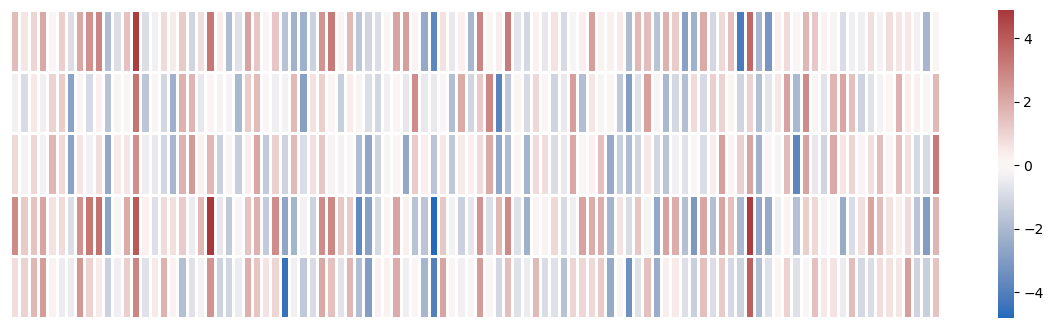

In [58]:
plt.figure(figsize=(15,4))
sns.heatmap([gensim_model.wv["king"], 
             gensim_model.wv["man"], 
             gensim_model.wv["woman"], 
             gensim_model.wv["king"] - gensim_model.wv["man"] + gensim_model.wv["woman"],
             gensim_model.wv["queen"],
            ], cbar=True, xticklabels=False, yticklabels=False,linewidths=1,cmap="vlag") 
plt.show()

In [126]:
x = gensim_model.wv["paris"] + gensim_model.wv["germany"] - gensim_model.wv["berlin"]

In [127]:
x

array([-0.8919679 , -0.20547116,  0.6892623 ,  1.2385235 ,  1.2700441 ,
       -1.3714788 , -2.264701  ,  2.3785021 ,  0.51728535,  1.0286282 ,
       -0.5796881 , -0.10380822, -0.7337619 , -0.9656749 , -0.7689143 ,
       -0.58741957, -1.458168  , -0.58896554,  0.8173344 , -3.9580445 ,
        5.1510587 ,  1.9139725 ,  0.5688826 ,  0.5130929 , -1.1744236 ,
        2.14064   , -0.34519386,  1.814579  ,  1.7292175 , -1.2431492 ,
       -3.2576442 , -0.42534783,  0.7432444 ,  1.9001745 , -0.6613988 ,
        2.351651  , -0.16808593, -2.1748931 , -0.31410235, -2.5854259 ,
       -0.8282623 ,  1.2231399 , -2.99468   , -1.3503776 ,  0.29197553,
        0.45788762,  1.127783  ,  0.23798816, -1.0942612 , -1.9327087 ,
        2.8371294 ,  0.6900089 ,  1.0411884 ,  1.0332592 ,  1.7357116 ,
        1.7034659 ,  1.8499067 ,  1.7247462 , -1.26912   ,  1.417038  ,
        3.3587997 ,  1.8756887 ,  1.23452   , -0.46674055, -1.183068  ,
       -1.1504893 ,  0.56879294,  1.3338518 ,  0.5837897 , -1.50

In [128]:
gensim_model.wv.most_similar(x)

[('germany', 0.772567093372345),
 ('france', 0.7692506909370422),
 ('italy', 0.763939380645752),
 ('paris', 0.759231448173523),
 ('spain', 0.6708950400352478),
 ('switzerland', 0.6493278741836548),
 ('belgium', 0.6480931043624878),
 ('austria', 0.6355417966842651),
 ('portugal', 0.5987979769706726),
 ('venice', 0.5922741293907166)]

In [61]:
gensim_model.wv["france"]

array([ 0.8481572 ,  1.4358995 ,  1.1210982 ,  0.49079347,  1.5217392 ,
        1.1375062 , -0.5457898 ,  3.6933763 ,  0.89648855,  0.8966094 ,
        0.10324363,  1.9829222 , -1.6448555 ,  0.20337754,  0.0551339 ,
        0.8032338 , -0.31656268,  0.8430107 , -0.7841185 , -4.326267  ,
        3.5980556 ,  1.937438  , -0.5598738 ,  0.24477632, -2.3196602 ,
        1.2665285 ,  0.3519903 ,  1.2993324 ,  1.5666205 , -2.6493065 ,
       -1.7349687 , -0.16536497,  0.9653249 ,  0.3972919 ,  1.0909655 ,
        1.3831468 ,  0.6179445 , -1.2737826 , -1.233569  , -1.0550328 ,
       -0.53933865,  1.0337771 , -0.9163713 , -0.99345237, -0.30156055,
        2.1620693 ,  0.98299366,  0.22673291, -1.0645688 , -0.788596  ,
        2.9771056 ,  0.904583  ,  0.8720574 ,  0.7503692 ,  0.5381557 ,
        1.7094492 ,  2.021951  ,  0.3020667 ,  0.051583  , -0.05115681,
        0.10006049,  1.0581207 ,  1.2859426 , -1.0524634 , -0.44664475,
       -1.0036279 ,  0.89804405,  1.1607999 ,  0.5447022 , -2.31

In [85]:
x.reshape(1, -1)

array([[-0.8919679 , -0.20547116,  0.6892623 ,  1.2385235 ,  1.2700441 ,
        -1.3714788 , -2.264701  ,  2.3785021 ,  0.51728535,  1.0286282 ,
        -0.5796881 , -0.10380822, -0.7337619 , -0.9656749 , -0.7689143 ,
        -0.58741957, -1.458168  , -0.58896554,  0.8173344 , -3.9580445 ,
         5.1510587 ,  1.9139725 ,  0.5688826 ,  0.5130929 , -1.1744236 ,
         2.14064   , -0.34519386,  1.814579  ,  1.7292175 , -1.2431492 ,
        -3.2576442 , -0.42534783,  0.7432444 ,  1.9001745 , -0.6613988 ,
         2.351651  , -0.16808593, -2.1748931 , -0.31410235, -2.5854259 ,
        -0.8282623 ,  1.2231399 , -2.99468   , -1.3503776 ,  0.29197553,
         0.45788762,  1.127783  ,  0.23798816, -1.0942612 , -1.9327087 ,
         2.8371294 ,  0.6900089 ,  1.0411884 ,  1.0332592 ,  1.7357116 ,
         1.7034659 ,  1.8499067 ,  1.7247462 , -1.26912   ,  1.417038  ,
         3.3587997 ,  1.8756887 ,  1.23452   , -0.46674055, -1.183068  ,
        -1.1504893 ,  0.56879294,  1.3338518 ,  0.5

In [123]:
from sklearn.metrics.pairwise import cosine_similarity

def get_most_similar_word(vec, word_vec):
    vec_reshaped = [vec]
        
    distances = [cosine_similarity(vec_reshaped, [word_vec[i]]) for i in range(len(word_vec))]
    max_distance_idx = distances.index(max(distances))
    return max_distance_idx

In [124]:
x_new = get_most_similar_word(x, gensim_model.wv)